# Taller OpenCV

### Instalar librerías

In [18]:
%pip install opencv-python numpy matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Librerías a usar

In [19]:
# Import necessary libraries
import cv2  # OpenCV for image processing
import matplotlib.image as mpi  # Matplotlib's image module to read images
import matplotlib.pyplot as plt  # Matplotlib to display images
import numpy as np  # NumPy for numerical operations on images

### Funciones útiles

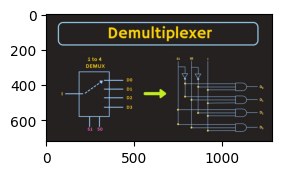

In [20]:
# Utility function to load an image from a file
def img(file):
    datos = mpi.imread(file)  # Reads the image file
    return datos  # Returns the image data as a NumPy array


# Utility function to display an image
def show(datos):
    f = plt.figure()  # Creates a new figure
    f.add_subplot(1, 2, 1)  # Adds a subplot to the figure
    plt.imshow(datos)  # Displays the image data
    plt.show()  # Renders the figure


# Load and display an image called "demux.jpg"
im = img("demux.jpg")  # Load the image into 'im'
show(im)  # Display the loaded image

### ¡Juguemos!

En esta sección se explicarán los conceptos básicos de manipulación de imagenes. Y también está libre a uso personal. Estos datos se pueden modificar para experimentar.


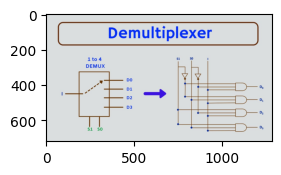

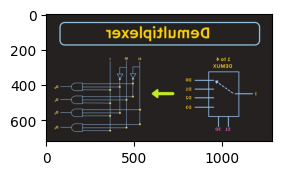

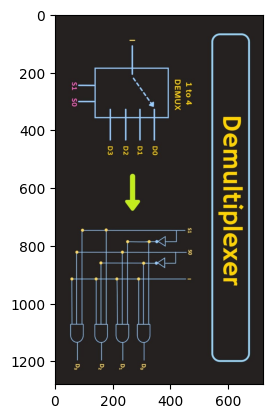

/var/folders/90/6v_z0cln6mv3sb9hmw8m9gb540vdbw/T/ipykernel_24607/3552822964.py:48: RuntimeWarning: overflow encountered in scalar add
  prom = (imagen[i][j][0] + imagen[i][j][1] + imagen[i][j][2]) / 3


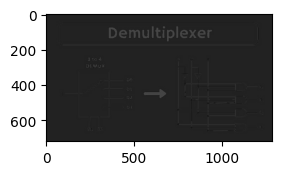

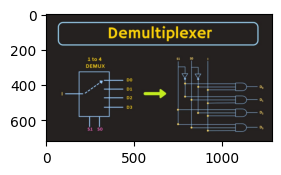

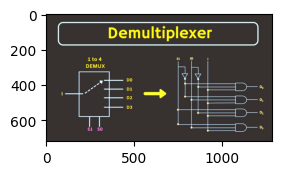

In [21]:
# Function to create a negative of an image
def negative(imagen):
    height = imagen.shape[0]  # Image height
    width = imagen.shape[1]  # Image width
    # Create a new empty image with the same dimensions
    img = np.zeros((height, width, 3), dtype=int)
    # Loop over all pixels and invert the color
    for i in range(height):
        for j in range(width):
            img[i][j][0] = 255 - imagen[i][j][0]  # Invert Red
            img[i][j][1] = 255 - imagen[i][j][1]  # Invert Green
            img[i][j][2] = 255 - imagen[i][j][2]  # Invert Blue
    return img  # Return the negative image


# Function to mirror an image horizontally
def mirror(imagen):
    height = imagen.shape[0]  # Image height
    width = imagen.shape[1]  # Image width
    img = np.zeros((height, width, 3), dtype=int)  # New empty image
    for i in range(width):
        for j in range(height):
            img[j][width - i - 1] = imagen[j][i]  # Copy pixels in reversed order
    return img  # Return the mirrored image


# Function to rotate an image by 90 degrees clockwise
def rotate90(imagen):
    height = imagen.shape[0]  # Image height
    width = imagen.shape[1]  # Image width
    # Create a new empty image with swapped height and width for the rotation
    img = np.zeros((width, height, 3), dtype=int)
    for i in range(height):
        for j in range(width):
            # Assign pixels to new positions to rotate the image
            img[j][height - 1 - i] = imagen[i][j]
    return img  # Return the rotated image


# Function to convert an image to grayscale
def grayScale(imagen):
    height = imagen.shape[0]  # Image height
    width = imagen.shape[1]  # Image width
    img = np.zeros((height, width, 3), dtype=int)  # New empty image
    for i in range(height):
        for j in range(width):
            # Calculate the average of the RGB values
            prom = (imagen[i][j][0] + imagen[i][j][1] + imagen[i][j][2]) / 3
            # Set each color channel to the calculated average for grayscale
            for k in range(3):
                img[i][j][k] = prom
    return img  # Return the grayscale image


# Function to find the smallest divisor greater than one for a given number
def minimo_divisor_mayor_a_uno(num):
    if num % 2 == 0:
        return 2  # Return 2 if the number is even
    else:
        # Check odd numbers starting from 3 to find the smallest odd divisor
        for i in range(3, num, 2):
            if num % i == 0:
                return i  # Return the divisor if found
    return num  # Return the number itself if no divisor found


# Function to calculate the mean color of a region in an image
def meanImage(col_inicio, fil_inicio, col_final, fil_fin, imagen):
    rprom, gprom, bprom = 0, 0, 0  # Initialize RGB mean values
    total_pixeles = (col_final - col_inicio) * (
        fil_fin - fil_inicio
    )  # Calculate total pixels
    for i in range(fil_inicio, fil_fin):
        for j in range(col_inicio, col_final):
            # Sum up the RGB values of each pixel
            rprom += imagen[i][j][0]
            gprom += imagen[i][j][1]
            bprom += imagen[i][j][2]
    # Calculate the mean of RGB values
    rprom /= total_pixeles
    gprom /= total_pixeles
    bprom /= total_pixeles
    return [rprom, gprom, bprom]  # Return the mean color


# Function to pixelate an image
def pixelar(imagen):
    height = imagen.shape[0]  # Image height
    width = imagen.shape[1]  # Image width
    # Find jump sizes for both dimensions
    altojump = minimo_divisor_mayor_a_uno(height)
    anchojump = minimo_divisor_mayor_a_uno(width)
    img = np.zeros((height, width, 3), dtype=int)  # New empty image
    for i in range(0, height, altojump):
        for j in range(0, width, anchojump):
            # Calculate the mean color of the current block
            color = meanImage(j, i, j + anchojump, i + altojump, imagen)
            # Apply the mean color to the entire block
            for x in range(i, min(i + altojump, height)):
                for c in range(j, min(j + anchojump, width)):
                    img[x][c] = color
    return img  # Return the pixelated image


# Function to increase the brightness of an image
def moreBrightness(imagen, factor):
    height = imagen.shape[0]  # Image height
    width = imagen.shape[1]  # Image width
    img = np.zeros((height, width, 3), dtype=int)  # New empty image
    for i in range(height):
        for j in range(width):
            for k in range(3):
                # Increase brightness by multiplying each color channel by the factor
                # Ensure that the result does not exceed 255
                img[i][j][k] = min(imagen[i][j][k] * factor, 255)
    return img  # Return the brightness-adjusted image


# Display the effects of the transformations on the loaded image
show(negative(im))
show(mirror(im))
show(rotate90(im))
show(grayScale(im))
show(pixelar(im))
show(moreBrightness(im, 1.5))